# Homework Assignment 7

## Pacage Setup

In [ ]:
!pip install turicreate
!pip install spaCy

In [ ]:
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


## Questions

**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


In [ ]:
import kaggle
!mkdir ./datasets
!mkdir ./datasets/dickens

# download the dataset from Kaggle and unzip it
!kaggle datasets download fuzzyfroghunter/dickens -p ./datasets/
!unzip ./datasets/dickens.zip  -d ./datasets/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/dickens’: File exists
dickens.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/dickens.zip
replace ./datasets/dickens/1289-0.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./datasets/dickens/1289-0.txt  
  inflating: ./datasets/dickens/1400-0.txt  
  inflating: ./datasets/dickens/1467-0.txt  
  inflating: ./datasets/dickens/27924-0.txt  
  inflating: ./datasets/dickens/564-0.txt  
  inflating: ./datasets/dickens/580-0.txt  
  inflating: ./datasets/dickens/644-0.txt  
  inflating: ./datasets/dickens/650-0.txt  
  inflating: ./datasets/dickens/653-0.txt  
  inflating: ./datasets/dickens/675-0.txt  
  inflating: ./datasets/dickens/678-0.txt  
  inflating: ./datasets/dickens/700-0.txt  
  inflating: ./datasets/dickens/766-0.txt  
  inflating: ./datasets/dickens/786-0.txt  
  inflating: ./datasets/dickens/807-0.txt  
  infl

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

datasets_path = "./datasets/dickens"
seven_poor_travellers_path = f"{datasets_path}/pg1392.txt"
oliver_path = f"{datasets_path}/pg730.txt"

In [ ]:
from tqdm import tqdm
txt_seven_poor_travellers = open(seven_poor_travellers_path).read()
txt_oliver = open(oliver_path).read()
spt_paragraphs_list = txt_seven_poor_travellers.split("\n\n")
o_paragraphs_list = txt_oliver.split("\n\n")
spt_links_dict = {}
o_links_dict = {}

def get_person_locations_links(txt):
    links_set = set()
    doc = nlp(txt)
    l = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON"]
    g = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "LOC" or entity.label_ == "GPE"]

    for e1 in l:
        for e2 in g:
            if len(e1) < 2:
                continue
            links_set.add((e1,e2))

    return links_set

seven_poor_travellers_links_list = []
oliver_links_list = []

for para in tqdm(spt_paragraphs_list):

    # for each paragraph each link counts only once
    seven_poor_travellers_links_list += list(get_person_locations_links(para))

for para in tqdm(o_paragraphs_list):

    # for each paragraph each link counts only once
    oliver_links_list += list(get_person_locations_links(para))

100%|██████████| 4088/4088 [00:52<00:00, 77.26it/s]


In [ ]:
from collections import Counter
import networkx as nx

spt_c = Counter(seven_poor_travellers_links_list)
o_c = Counter(oliver_links_list)

In [ ]:
spt_g = nx.Graph()

for e,count in dict(spt_c).items():
    if count < 2:
        # only links that appeared at least 2 times
        continue
    v1,v2 = e
    spt_g.add_node(v1, type="person")
    spt_g.add_node(v2, type="location")
    spt_g.add_edge(v1,v2, weight=count)

nx.info(spt_g)


'Graph with 11 nodes and 8 edges'

In [ ]:
nx.write_gexf(spt_g, "./datasets/dickens/seven_poor_travellers_network_full.gexf")

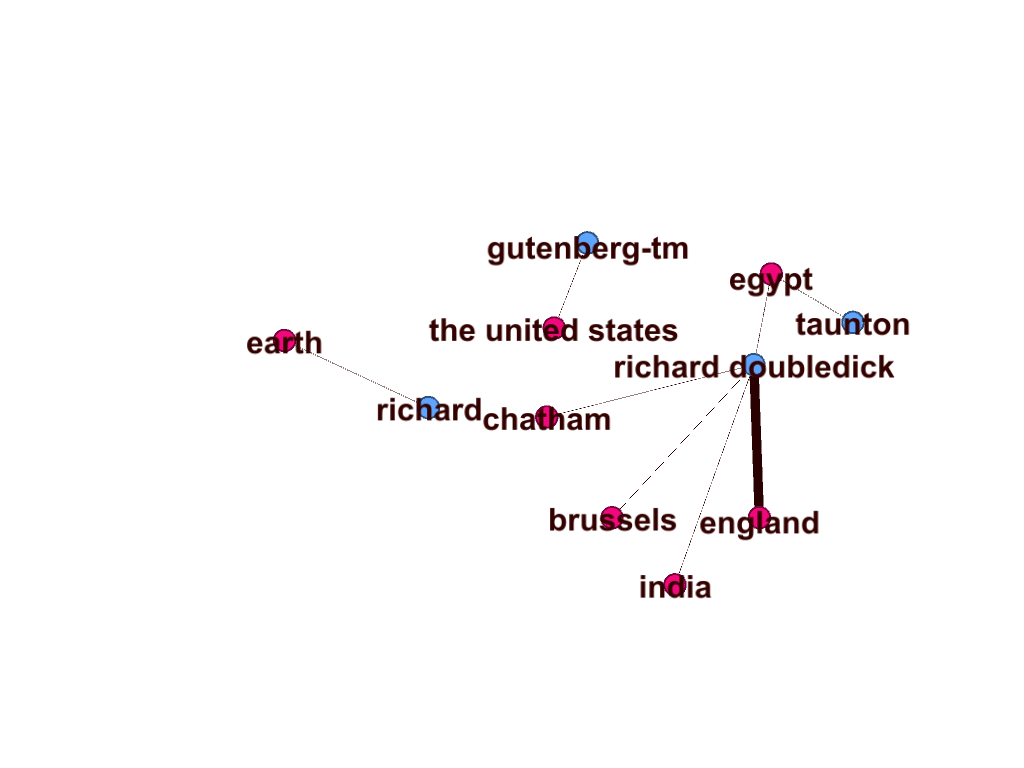

In [ ]:
o_g = nx.Graph()

for e,count in dict(o_c).items():
    if count < 2:
        # only links that appeared at least 2 times
        continue
    v1,v2 = e
    o_g.add_node(v1, type="person")
    o_g.add_node(v2, type="location")
    o_g.add_edge(v1,v2, weight=count)

nx.info(o_g)


'Graph with 23 nodes and 23 edges'

In [ ]:
nx.write_gexf(o_g, "./datasets/dickens/oliver_network_full.gexf")

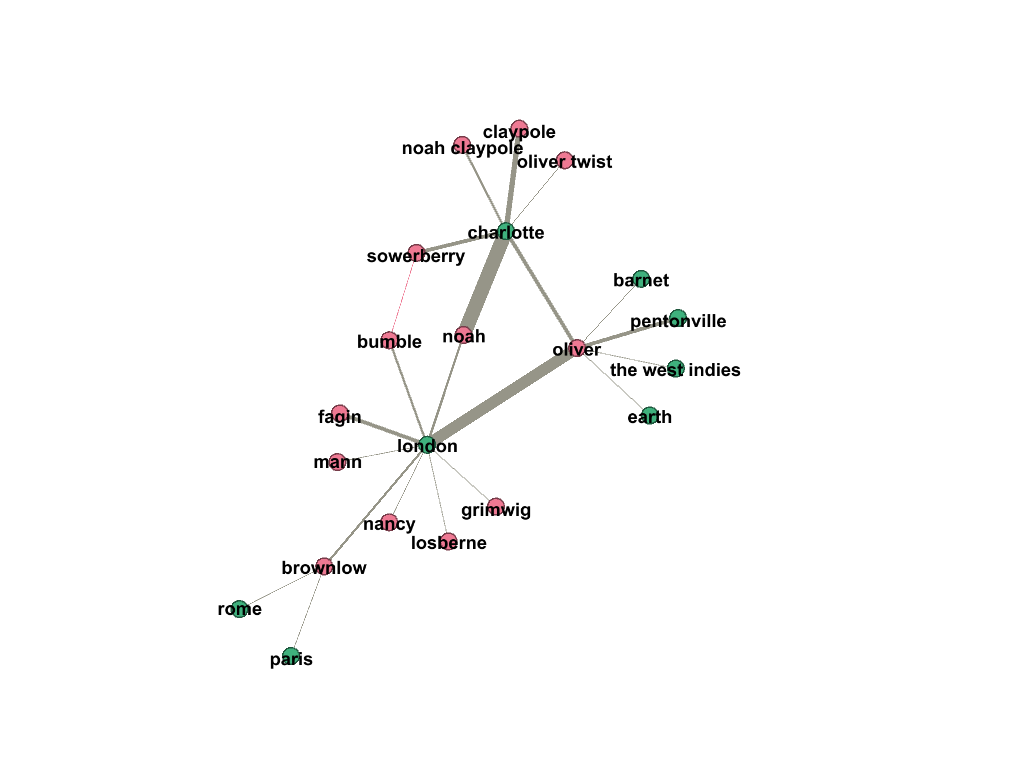

**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [ ]:
!kaggle datasets list -s 'Friends TV Show Transcript'

ref                                 title                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------  --------------------------  ----  -------------------  -------------  ---------  ---------------  
ryanstonebraker/friends-transcript  Friends TV Show Transcript   2MB  2020-04-28 00:35:59           1344         13  0.7058824        


In [ ]:
!mkdir ./datasets/friends-transcript

# download the dataset from Kaggle and unzip it
!kaggle datasets download ryanstonebraker/friends-transcript -p ./datasets/friends-transcript/
!unzip ./datasets/friends-transcript/friends-transcript.zip  -d ./datasets/friends-transcript/

mkdir: cannot create directory ‘./datasets/friends-transcript’: File exists
friends-transcript.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/friends-transcript/friends-transcript.zip
replace ./datasets/friends-transcript/friends_quotes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./datasets/friends-transcript/friends_quotes.csv  


In [ ]:
import turicreate as tc
sf = tc.SFrame.read_csv('./datasets/friends-transcript/friends_quotes.csv')
sf

Finished parsing file /content/datasets/friends-transcript/friends_quotes.csv

Parsing completed. Parsed 100 lines in 0.23469 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,str,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/friends-transcript/friends_quotes.csv

Parsing completed. Parsed 60291 lines in 0.144556 secs.

author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [ ]:
def get_friend(friend):
    f = str(friend).lower()
    if f not in ['monica', 'joey', 'chandler', 'phoebe', 'rachel', 'ross']:
        return None
    return f

sf['author'] = sf['author'].apply(lambda g: get_friend(g))

Use the Friends TV Show Transcript to create and evaluate a classifier that given a line of text can predict who is the "friend" that said it:

In [ ]:
import turicreate.aggregate as agg

sf = sf[sf['author'] != None]
g = sf.groupby('author', {'count':agg.COUNT()})
g = g.sort("count", ascending=False)
df = g.to_dataframe()
g.print_rows()

+----------+-------+
|  author  | count |
+----------+-------+
|  rachel  |  8956 |
|   ross   |  8921 |
| chandler |  8180 |
|  monica  |  8175 |
|   joey   |  8016 |
|  phoebe  |  7261 |
+----------+-------+
[6 rows x 2 columns]



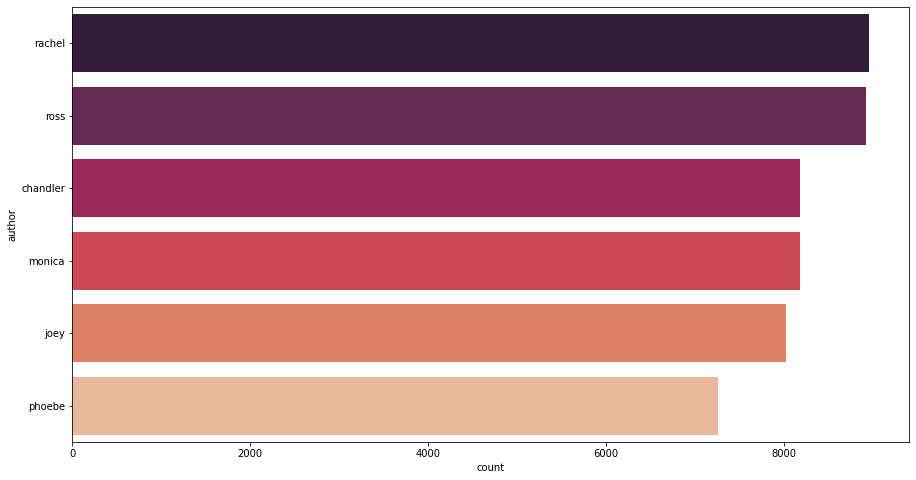

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(y=df['author'], x=df["count"], palette="rocket")

In [ ]:
from tqdm import tqdm
vector_list = []
for plot in tqdm(sf['quote']):
    vector_list.append(nlp(plot).vector)
sf['vector'] = vector_list

100%|██████████| 49509/49509 [06:33<00:00, 125.93it/s]


In [ ]:
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['quote'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['quote'], n=2, method='word')

In [ ]:
train,test = sf.random_split(0.8)
cls = tc.classifier.create(train, features=['vector','words_1grams', 'words_2grams'], target="author")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37671

Number of classes           : 6

Number of feature columns   : 3

Number of unpacked features : 139197

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 5.156867     | 0.278172          | 0.225416            | 1.759309          | 1.777431            |

| 2         | 10.497776    | 0.307717          | 0.217347            | 1.732311          | 1.769549            |

| 3         | 15.814685    | 0.322450          | 0.230459            | 1.710858          | 1.763334            |

| 4         | 21.186290    | 0.342943          | 0.235502            | 1.690508          | 1.759564            |

| 5         | 26.560235    | 0.358127          | 0.236006            | 1.672979          | 1.754586            |

| 7         | 36.795953    | 0.375674          | 0.246596            | 1.645630          | 1.744975            |

| 8         | 41.819423    | 0.387380          | 0.248613            | 1.632038          | 1.742042            |

| 9         | 46.533124    | 0.395105          | 0.249622            | 1.622079          | 1.737697            |

| 10        | 51.502190    | 0.400228          | 0.257690            | 1.612310          | 1.734854            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 37671

Number of classes           : 6

Number of feature columns   : 3

Number of unpacked features : 139197

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 4.366678     | 0.264580          | 0.218356            | 1.722074          | 1.766999            |

| 2         | 8.695091     | 0.293329          | 0.238527            | 1.710503          | 1.759452            |

| 3         | 13.039871    | 0.302355          | 0.238023            | 1.705587          | 1.756616            |

| 4         | 17.145182    | 0.308699          | 0.237015            | 1.703303          | 1.752789            |

| 5         | 21.330748    | 0.313822          | 0.250126            | 1.701797          | 1.751147            |

| 7         | 29.971650    | 0.325874          | 0.241049            | 1.699161          | 1.752554            |

| 8         | 34.501982    | 0.328077          | 0.240545            | 1.698835          | 1.752840            |

| 9         | 38.753181    | 0.327679          | 0.241049            | 1.698513          | 1.752732            |

| 10        | 42.939671    | 0.330466          | 0.243066            | 1.698549          | 1.753024            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 37671

Number of classes           : 6

Number of feature columns   : 3

Number of unpacked features : 139197

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 5.212099     | 0.278172          | 0.225416            | 1.709263          | 1.769697            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 37671

Number of classes           : 6

Number of feature columns   : 3

Number of unpacked features : 139197

Number of coefficients      : 695990

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 2.225139     | 0.537151          | 0.226425            |

| 1         | 4        | 1.000000  | 27.577356    | 0.653951          | 0.256178            |

| 2         | 6        | 0.787218  | 51.204352    | 0.742826          | 0.283913            |

| 3         | 7        | 0.984023  | 73.452784    | 0.792068          | 0.284418            |

| 4         | 8        | 1.000000  | 95.900235    | 0.799023          | 0.293495            |

| 6         | 10       | 1.000000  | 142.183852   | 0.825144          | 0.283409            |

| 7         | 11       | 1.000000  | 163.874192   | 0.838151          | 0.282905            |

| 8         | 12       | 1.000000  | 186.107849   | 0.843168          | 0.281392            |

| 9         | 13       | 1.000000  | 208.398102   | 0.850707          | 0.278870            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.25769036812909735
PROGRESS: RandomForestClassifier          : 0.24306606152294502
PROGRESS: DecisionTreeClassifier          : 0.2254160363086233
PROGRESS: LogisticClassifier              : 0.2788703983862834
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [ ]:
e = cls.evaluate(test)
e

{'accuracy': 0.2898021308980213,
 'auc': 0.6267942258573665,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 36
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    phoebe    |       ross      |  179  |
 |     ross     |      phoebe     |  174  |
 |   chandler   |      rachel     |  250  |
 |   chandler   |     chandler    |  436  |
 |   chandler   |       joey      |  238  |
 |    phoebe    |       joey      |  193  |
 |     ross     |       joey      |  249  |
 |    rachel    |       ross      |  248  |
 |    monica    |      phoebe     |  189  |
 |     joey     |     chandler    |  272  |
 +--------------+-----------------+-------+
 [36 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.28877430574355817,
 'log_loss': 3.2690766452523494

In [ ]:
e['confusion_matrix'].sort('count', ascending=False).print_rows(100)

+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|    rachel    |      rachel     |  571  |
|     ross     |       ross      |  564  |
|     joey     |       joey      |  498  |
|   chandler   |     chandler    |  436  |
|    monica    |      monica     |  406  |
|    phoebe    |      phoebe     |  381  |
|    monica    |     chandler    |  306  |
|     ross     |      rachel     |  300  |
|     ross     |     chandler    |  299  |
|    rachel    |      monica     |  297  |
|    monica    |      rachel     |  288  |
|     joey     |       ross      |  273  |
|     joey     |     chandler    |  272  |
|    rachel    |     chandler    |  257  |
|   chandler   |      monica     |  250  |
|   chandler   |      rachel     |  250  |
|    phoebe    |      rachel     |  250  |
|     ross     |       joey      |  249  |
|    rachel    |       ross      |  248  |
|   chandler   |       ross      |  243  |
|     joey 

Using sentiment analysis identify who are the most and less friendly friends:

In [ ]:
mg = sf.groupby('author', tc.aggregate.CONCAT('quote'))
mg['List of quote'] =mg['List of quote'].apply(lambda l: " ".join(map(str, l)))
mg

author,List of quote
ross,"Yeah. Hey! (enters) Wow,couples who live toge ..."
monica,Why don't you just bestraight with her? Tell ...
joey,"(jumps out of the box) IGotcha!! Boy, it was so ..."
chandler,"OK, I'm officiallyunpacked. Thanks for ..."
phoebe,"Wait, does he eat chalk?Just, 'cause, I don't ..."
rachel,Oh God Monica hi! ThankGod! I just went to your ...


In [ ]:
friends_list = []
for quote in mg['List of quote']:
    q = nlp(quote)
    friends_list.append([entity.text.lower().strip() for entity in q.ents if entity.label_ == "PERSON"])

mg['friends_list'] = tc.SArray(friends_list)
mg['num_friends'] = mg['friends_list'].apply(lambda lst: len(set(lst)))
mg

author,List of quote,friends_list,num_friends
ross,"Yeah. Hey! (enters) Wow,couples who live toge ...","[monica, kay, monica,joey, joey, chandler, ...",637
monica,Why don't you just bestraight with her? Tell ...,"[rachel, ross, ross,naked, chandler, ...",461
joey,"(jumps out of the box) IGotcha!! Boy, it was so ...","[chandler, chandler,monica, pizza, joey, ...",604
chandler,"OK, I'm officiallyunpacked. Thanks for ...","[joey, joe, joey, ross,ross, ross, monica, ...",616
phoebe,"Wait, does he eat chalk?Just, 'cause, I don't ...","[ross, rachel, monica,chandler, joey, chand ...",561
rachel,Oh God Monica hi! ThankGod! I just went to your ...,"[barry, barry, potatohead, monica, monica, ...",588


In [ ]:
most_friendly_friend = mg.sort("num_friends", ascending=False)
most_friendly_friend

author,List of quote,friends_list,num_friends
ross,"Yeah. Hey! (enters) Wow,couples who live toge ...","[monica, kay, monica,joey, joey, chandler, ...",637
chandler,"OK, I'm officiallyunpacked. Thanks for ...","[joey, joe, joey, ross,ross, ross, monica, ...",616
joey,"(jumps out of the box) IGotcha!! Boy, it was so ...","[chandler, chandler,monica, pizza, joey, ...",604
rachel,Oh God Monica hi! ThankGod! I just went to your ...,"[barry, barry, potatohead, monica, monica, ...",588
phoebe,"Wait, does he eat chalk?Just, 'cause, I don't ...","[ross, rachel, monica,chandler, joey, chand ...",561
monica,Why don't you just bestraight with her? Tell ...,"[rachel, ross, ross,naked, chandler, ...",461


 Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number:

In [ ]:
sf_grouped_episode_season = sf.groupby(['episode_number', 'season'], tc.aggregate.CONCAT('quote'))
sf_grouped_episode_season['full_quotes'] = sf_grouped_episode_season['List of quote'].apply(lambda l: " ".join(l))
sf_grouped_episode_season

episode_number,season,List of quote,full_quotes
18.0,9.0,"[Monica, hey, can Iborrow the Porsche?, ...","Monica, hey, can I borrowthe Porsche? Ok. Alri ..."
3.0,3.0,"[Look, he gave me hisnight vision goggles and ...","Look, he gave me hisnight vision goggles and ..."
19.0,1.0,"[Which one?, Those cutelittle black ones I wear ...",Which one? Those cutelittle black ones I wear ...
12.0,6.0,"[Hey, youre not going tobelieve this. I made ...","Hey, youre not going tobelieve this. I made ..."
10.0,10.0,[(really excited) Mmh...this cake is amazing! ...,(really excited) Mmh...this cake is amazing! My ...
12.0,10.0,"[Oh, hey Joey., Uh, hey.,Listen, I need to ask ...","Oh, hey Joey. Uh, hey.Listen, I need to ask ..."
1.0,3.0,"[I'm tellin' ya that girltotally winked at me., ...",I'm tellin' ya that girltotally winked at me. ...
10.0,6.0,"[Really?, What do youmean?, Uh-huh., No-no ...",Really? What do you mean?Uh-huh. No-no-no-no-n ...
15.0,1.0,"[(to Joey) Coffee. (Handsit to him.), Thank you., ...",(to Joey) Coffee. (Handsit to him.) Thank you. ...
11.0,2.0,"[Ok. Here's his diaperbag, and his uh, Mr. ...","Ok. Here's his diaperbag, and his uh, Mr. ..."


In [ ]:
from tqdm import tqdm
vector_list = []
for plot in tqdm(sf_grouped_episode_season['full_quotes']):
    vector_list.append(nlp(plot).vector)
sf_grouped_episode_season['vector'] = vector_list

100%|██████████| 225/225 [01:25<00:00,  2.64it/s]


In [ ]:
sf_grouped_episode_season['words_1grams'] = tc.text_analytics.count_ngrams(sf_grouped_episode_season['full_quotes'], n=1, method='word')
sf_grouped_episode_season['words_2grams'] = tc.text_analytics.count_ngrams(sf_grouped_episode_season['full_quotes'], n=2, method='word')

In [ ]:
sf_grouped_episode_season['season'] = sf_grouped_episode_season['season'].astype(int)

In [ ]:
train,test = sf_grouped_episode_season.random_split(0.8)

In [ ]:
cls = tc.classifier.create(train, features=['vector','words_1grams', 'words_2grams'], target="season")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 171

Number of classes           : 10

Number of feature columns   : 3

Number of unpacked features : 154162

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.727937     | 1.000000          | 0.800000            | 1.434761          | 1.695758            |

| 2         | 1.464758     | 1.000000          | 0.900000            | 0.989808          | 1.459866            |

| 3         | 2.220784     | 1.000000          | 0.900000            | 0.719214          | 1.260091            |

| 4         | 3.004750     | 1.000000          | 0.900000            | 0.536313          | 1.119300            |

| 5         | 3.741947     | 1.000000          | 0.900000            | 0.406268          | 1.035028            |

| 10        | 7.619513     | 1.000000          | 0.800000            | 0.121828          | 0.866124            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 171

Number of classes           : 10

Number of feature columns   : 3

Number of unpacked features : 154162

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.556791     | 0.853801          | 0.500000            | 0.689016          | 1.342821            |

| 2         | 1.095441     | 0.953216          | 0.800000            | 0.541840          | 0.770306            |

| 3         | 1.642436     | 0.970760          | 0.800000            | 0.536291          | 1.006982            |

| 4         | 2.219312     | 0.994152          | 0.700000            | 0.487833          | 0.989584            |

| 5         | 2.783207     | 1.000000          | 0.800000            | 0.465316          | 1.069012            |

| 10        | 5.466834     | 1.000000          | 0.800000            | 0.436002          | 1.097081            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 171

Number of classes           : 10

Number of feature columns   : 3

Number of unpacked features : 154162

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.715540     | 1.000000          | 0.800000            | 0.306747          | 1.097287            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 171

Number of classes           : 10

Number of feature columns   : 3

Number of unpacked features : 154162

Number of coefficients      : 1387467

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.357587     | 1.000000          | 0.400000            |

| 1         | 3        | 1.000000  | 0.814638     | 1.000000          | 0.400000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8
PROGRESS: RandomForestClassifier          : 0.8
PROGRESS: DecisionTreeClassifier          : 0.8
PROGRESS: LogisticClassifier              : 0.4
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [ ]:
e = cls.evaluate(test)
e

{'accuracy': 0.5909090909090909,
 'auc': 0.9439832960685018,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 25
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      8       |        8        |   3   |
 |      8       |        7        |   1   |
 |      9       |        5        |   1   |
 |      6       |        4        |   2   |
 |      2       |        2        |   5   |
 |      10      |        9        |   1   |
 |      4       |        4        |   2   |
 |      9       |        9        |   2   |
 |      6       |        3        |   1   |
 |      10      |        10       |   2   |
 +--------------+-----------------+-------+
 [25 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.606991341991342,
 'log_loss': 1.201663031041676,
 